### 1. Chargement des données à l'aide de la bibliothèque Pandas.

- Afficher les 10 premiére lignes
- Vérifier le type et la structure des colonnes.

In [502]:
import pandas as pd
from os import getcwd

df = pd.read_csv(getcwd() + '/../data/raw/assurance-maladie.csv')

print(df.head(10))
print()
print(df.columns)
print()
print(df.dtypes)



   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### 2. Analyse exploratoire des données (EDA)
##### 2.1. Comprendre la structure générale du jeu de données (types de données, dimensions, aperçus).
- Afficher des details sur les données en inclus leurs types
- Afficher les dimensions : nombre des lignes, nombres des colonnes 

In [468]:
print(df.info())

print()

print(df.shape) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

(1338, 7)


##### 2.2. Affectuer une analyse descriptive des données (moyennes, médianes, écarts-types pour les variables numériques ; fréquences pour les catégoriques).

Variables numériques:
- Moyennes (mean)
- Médianes (50%)
- Ecarts-types (std)

In [473]:
stats = df.describe()

print(stats.loc['mean'])
print()
print(stats.loc['50%'])
print()
print(stats.loc['std'])

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
Name: mean, dtype: float64

age           39.000
bmi           30.400
children       1.000
charges     9382.033
Name: 50%, dtype: float64

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
Name: std, dtype: float64


Variables qualitatives:
- Fréquences des catégoriques (sex, region, smoker)

In [474]:
print(df["sex"].value_counts())
print()
print(df["region"].value_counts())
print()
print(df["smoker"].value_counts())

sex
male      676
female    662
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64


##### 2.3. Identifier les valeurs manquantes et les doublons.
- Dataframe représentant les lignes qui contient des valeurs manquantes
- Nombre des valeurs null pour chaque colonne

In [484]:
print(df[df.isnull().any(axis=1)])

print()

print(df.isnull().sum())

      age     sex     bmi  children smoker     region      charges
530   NaN    male  42.130       1.0    yes  southeast  48675.51770
535  38.0    male  28.025       NaN     no  northeast   6067.12675
538  46.0  female  28.050       NaN     no  southeast   8233.09750
540   NaN  female  38.000       3.0     no  southwest   6196.44800
541  20.0  female  31.790       2.0     no  southeast          NaN

age         2
sex         0
bmi         0
children    2
smoker      0
region      0
charges     1
dtype: int64


Dataframe représentant les lignes doublons

In [485]:
print(df[df.duplicated()])

      age   sex    bmi  children smoker     region    charges
581  19.0  male  30.59       0.0     no  northwest  1639.5631


##### 2.4. Analyser la distribution des variables numériques (ex. : histogrammes avec Matplotlib/Seaborn).

Diagramme circulaire qui affiche la distribution des genres

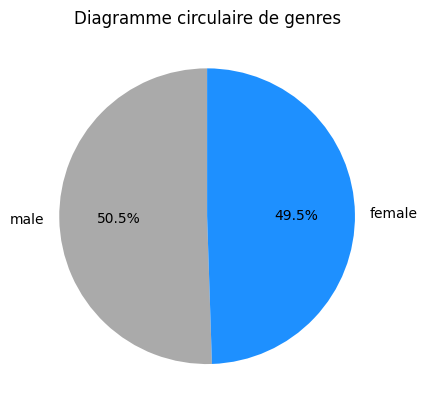

sex
male      676
female    662
Name: count, dtype: int64


In [505]:
import matplotlib.pyplot as plt

# Gender Diagram

sex_counts = df["sex"].value_counts()

plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%", startangle=90, colors=["#AAA", "dodgerblue"])
plt.title("Diagramme circulaire de genres")
plt.show()

print(sex_counts)


Diagramme circulaire qui affiche la distribution des habitudes tabagiques

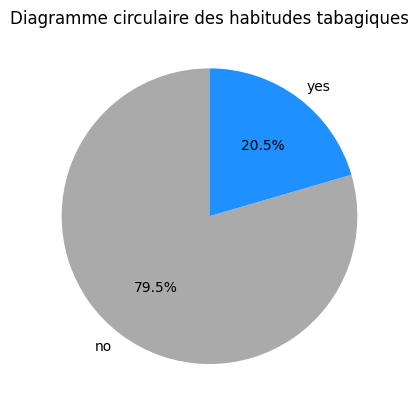

smoker
no     1064
yes     274
Name: count, dtype: int64


In [506]:
# Smoker diagram

smoker_counts = df["smoker"].value_counts()

plt.pie(smoker_counts, labels=smoker_counts.index, autopct="%1.1f%%", startangle=90, colors=["#AAA", "dodgerblue"])
plt.title("Diagramme circulaire des habitudes tabagiques")
plt.show()

print(smoker_counts)

Diagramme circulaire qui affiche la distribution des regions

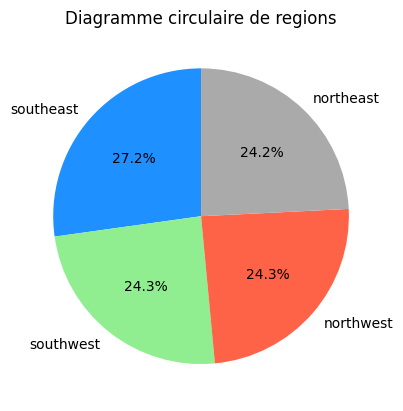

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [507]:
# Region diagram

region_counts = df["region"].value_counts()

plt.pie(region_counts, labels=region_counts.index, autopct="%1.1f%%", startangle=90, colors=["dodgerblue", "lightgreen", "#FF6347", '#AAA'])
plt.title("Diagramme circulaire de regions")
plt.show()

print(region_counts)


Histogramme qui affiche la distribution de nombre d’enfants

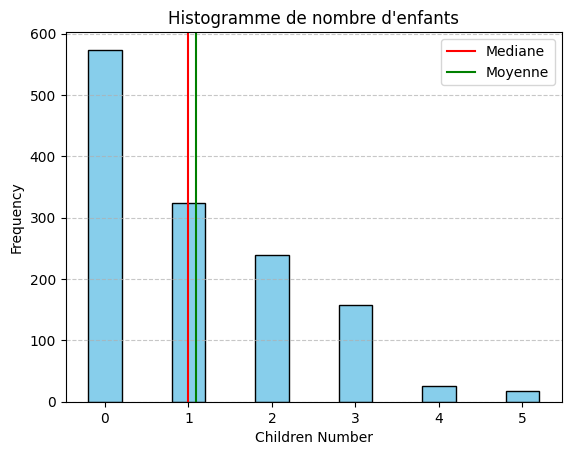

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64 

Moyenne 1.0949177877429
Mediane 1.0


In [516]:
plt.hist(df["children"], bins=range(0, df["children"].max() + 2, 1), rwidth=0.4, color="skyblue", edgecolor="black", align="left")
plt.title("Histogramme de nombre d'enfants")
plt.xlabel("Children Number")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

mediane = plt.axvline(df["children"].median())
mediane.set_color('red')
mediane.set_label('Mediane')

moyenne = plt.axvline(df["children"].mean())
moyenne.set_color('green')
moyenne.set_label('Moyenne')

plt.legend()
plt.show()

print(df['children'].value_counts(), '\n')
print('Moyenne', df["children"].mean())
print('Mediane', df["children"].median())

Histogramme qui affiche la distribution des ages

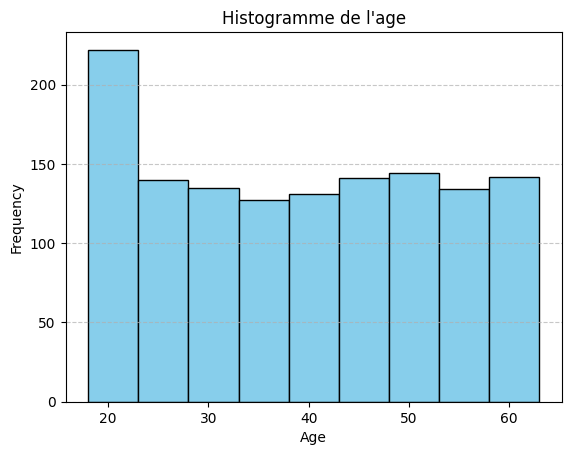

Bins:  [18. 23. 28. 33. 38. 43. 48. 53. 58. 63.]
Counts:  [222. 140. 135. 127. 131. 141. 144. 134. 142.] 

Min: 18
Max: 64
Moyenne: 39.20702541106129
Mediane: 39.0


In [518]:
counts, bins, _ = plt.hist(df["age"], bins=range(df["age"].min(), df["age"].max() + 2, 5), color="skyblue", edgecolor="black", align="mid")
plt.title("Histogramme de l'age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

print('Bins: ', bins)
print('Counts: ', counts, '\n')

print('Min:', df["age"].min())
print('Max:', df["age"].max())
print('Moyenne:', df["age"].mean())
print('Mediane:', df["age"].median())


Histogramme qui affiche la distribution de l’indice de masse corporelle

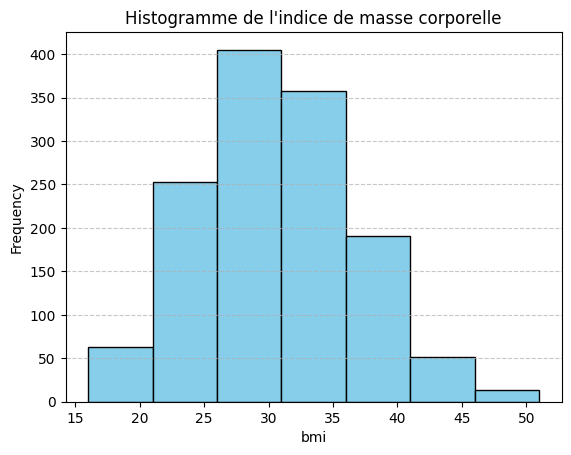

Bins:  [16. 21. 26. 31. 36. 41. 46. 51.]
Counts:  [ 63. 253. 405. 357. 191.  52.  14.] 

Min: 15.96
Max: 53.13
Moyenne: 30.66339686098655
Mediane: 30.4


In [515]:
counts, bins, _ = plt.hist(df["bmi"], bins=range(round(df["bmi"].min()), round(df["bmi"].max()) + 2, 5), color="skyblue", edgecolor="black", align="mid")
plt.title("Histogramme de l'indice de masse corporelle")
plt.xlabel("bmi")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

print('Bins: ', bins)
print('Counts: ', counts, '\n')

print('Min:', df["bmi"].min())
print('Max:', df["bmi"].max())
print('Moyenne:', df["bmi"].mean())
print('Mediane:', df["bmi"].median())


Histogramme qui affiche la distribution des charges

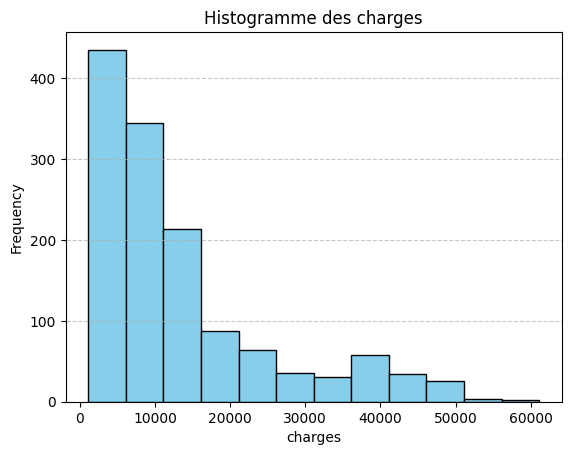

Bins:  [ 1122.  6122. 11122. 16122. 21122. 26122. 31122. 36122. 41122. 46122.
 51122. 56122. 61122.]
Counts:  [435. 345. 214.  88.  64.  35.  31.  58.  34.  26.   3.   2.] 

Min: 1121.8739
Max: 63770.42801
Moyenne: 13270.422265141257
Mediane: 9382.033


In [514]:
counts, bins, _ = plt.hist(df["charges"], bins=range(round(df["charges"].min()), round(df["charges"].max()) + 2, 5000), color="skyblue", edgecolor="black", align="mid")
plt.title("Histogramme des charges")
plt.xlabel("charges")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

print('Bins: ', bins)
print('Counts: ', counts, '\n')

print('Min:', df["charges"].min())
print('Max:', df["charges"].max())
print('Moyenne:', df["charges"].mean())
print('Mediane:', df["charges"].median())


##### 2.5. Étudier les relations entre variables à l'aide de matrices de corrélation et de visualisations (ex. : pairplots ou heatmaps).

Matrice de corrélation 

In [523]:
corr = df.corr(numeric_only=True)

print(corr)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Heatmaps

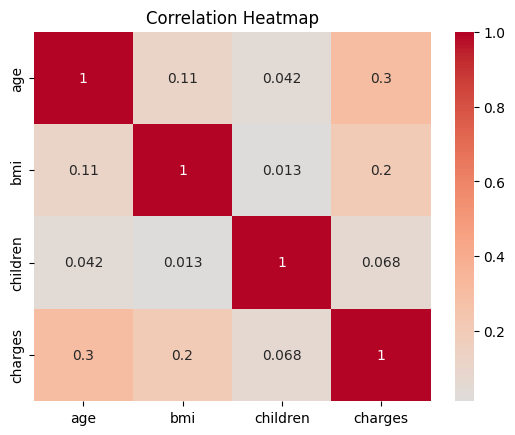

In [539]:
import seaborn as sns

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()
